In [1]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import scale

from code.organize import *
from code.roughEDA import *
from code.survey_processor_full import *
from code.model_vis import *
from code.fc import *
from code.fc_cluster import *
from code.clusterEDA import *


import plotly.plotly as py
from plotly.tools import FigureFactory as FF
import plotly.graph_objs as go

%matplotlib inline
%load_ext autoreload
%autoreload 2

In this file, I will wrapp up the clusions from step7_cluster_study and more concise graphs. 

In [2]:
df = pd.read_pickle('data/df_id.pkl')       # Load survey data with cluster_id
fc = FeatureContribution('data/fc_df2.pkl')  # Load feature contribution data
fc_df = fc.cluster_processor(3,6)            # generate cluster

# Cluster 1 (Unemployed)

Main contributors
* ### agekdbrn: historgram and median. Median is easier to interpret and I will use to for presentation slide.

In [3]:
c1 =df[df.cluster==1]

In [4]:
c1.agekdbrn.median()

19.0

* ### degree: Respondents' degree in this cluster is very speciall. All less than high school. So I can just write a sentence or use an icon to summerize it. 

* ### dwelling, class_ and incom16 all reflect respondents financial situation some how. Select interesting part of each and put on the same bar chart.

In [5]:
c1_fin = subset_all(df,1,['incom16','dwelling','class_'],[['Far below average','Below average'],
                                                           ['Row house','Trailer'],['Lower class']])

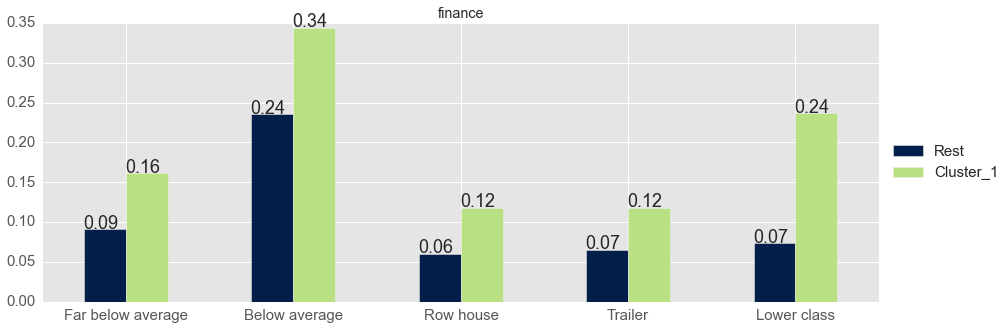

In [6]:
comb_bar(c1_fin,color = ['#031F49','#BAE084'], figsize = (15,5),fontsize = 15, title = 'finance')

* ### Political views and social life reflect respondents' world view and life style. 

In [7]:
c1_life = subset_all(df,1,['polviews','socfrend'],[["Don't know", 'Extremely liberal'],['Never']])

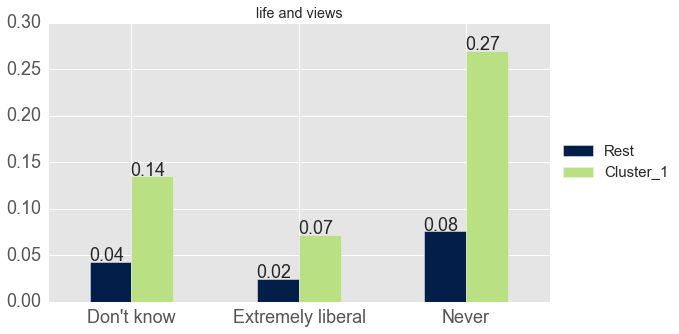

In [8]:
comb_bar(c1_life,color = ['#031F49','#BAE084'], figsize = (9,5),title = "life and views", fontsize = 18)

# Cluster 4 (Employed)

* ### agekdbrn

In [9]:
df[df.cluster==4].agekdbrn.median()

19.0

* ## degree

In [10]:
df[df.cluster==4].degree.value_counts()

Lt high school    259
Name: degree, dtype: int64

* ### dwelling and incom 16

In [11]:
c4_fin = subset_all(df,4,['dwelling','incom16'],[['Detached 1-fam house'],['Far below average']])

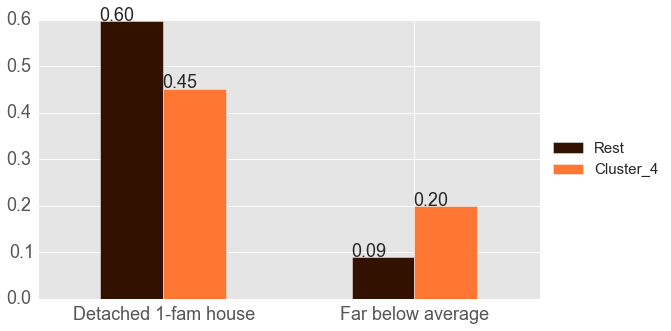

In [12]:
comb_bar(c4_fin,color = ['#331100','#ff7733'],figsize=(9,5),fontsize = 18)

* ### politics: polviews

In [13]:
c4_pol = subset_normed_df(df,4,'polviews',["Don't know"])

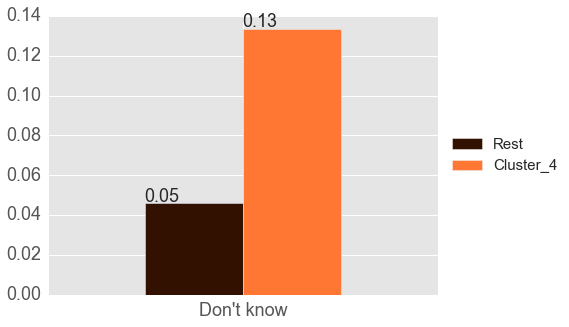

In [14]:
comb_bar(c4_pol,color = ['#331100','#ff7733'], figsize = (7,5),fontsize = 18)

# Cluster 5 (Unemployed)

* ### agekdbrn 

In [15]:
df[df.cluster ==5].agekdbrn.median()

22.0

* ### sphrs1

In [16]:
c5 = df[df.cluster==5]

c5[c5.sphrs1 <98].sphrs1.mean()

47.16

* ### Degree

In [17]:
c5_edu = subset_normed_df(df,5, 'degree',['High school','Bachelor','Graduate'])

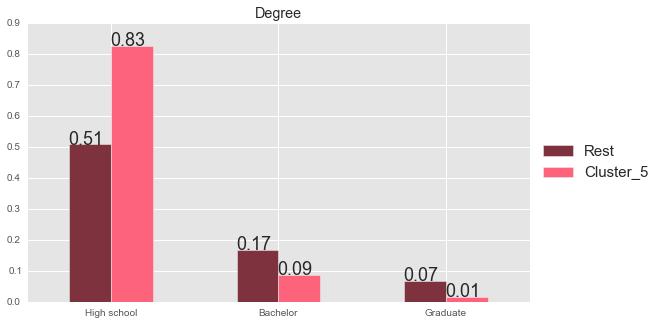

In [19]:
comb_bar(c5_edu,color = ['#7E323D', '#FD637A'], title = 'Degree',figsize=(9,5))

* ### Financial Situation and Dwelling

In [20]:
c5_fin = subset_all(df,5,['dwelling','finrela'],
                    [['Apartment-4 stories','Apartment house'],
                    ['Below average','Far below average']])

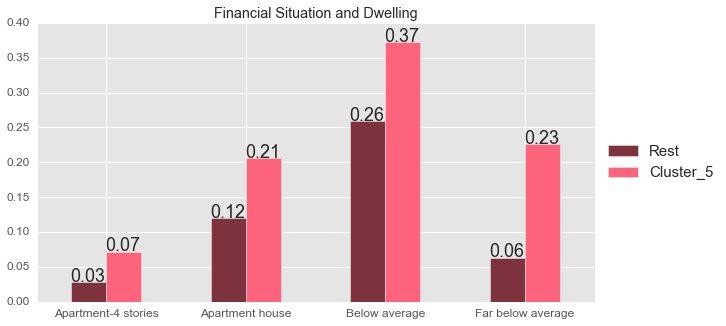

In [21]:
comb_bar(c5_fin, color = ['#7E323D', '#FD637A'],
         title = "Financial Situation and Dwelling", figsize = (10,5), fontsize = 12)


# Cluster 3 (Employed)

* ### agekdbrn

In [22]:
df[df.cluster ==3].agekdbrn.median()

21.0

* ### degree

In [23]:
c3_degree = subset_normed_df(df,3,'degree',['High school','Bachelor'])

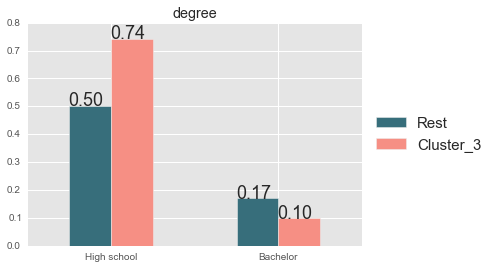

In [24]:
comb_bar(c3_degree,color = ['#376E7B', '#F68F84'],title = 'degree')

In [25]:
c3_class = subset_normed_df(df,3,'class_', ['Working class'])

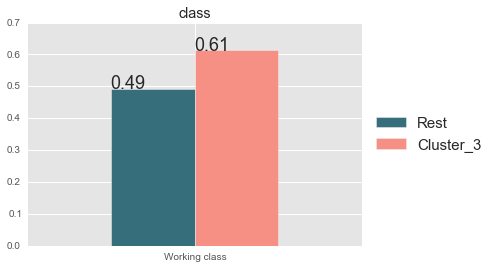

In [26]:
comb_bar(c3_class,color = ['#376E7B', '#F68F84'],title = 'class')

In [27]:
c3_mari = subset_normed_df(df,3, 'marital',['Divorced', 'Never married', 'Married'])

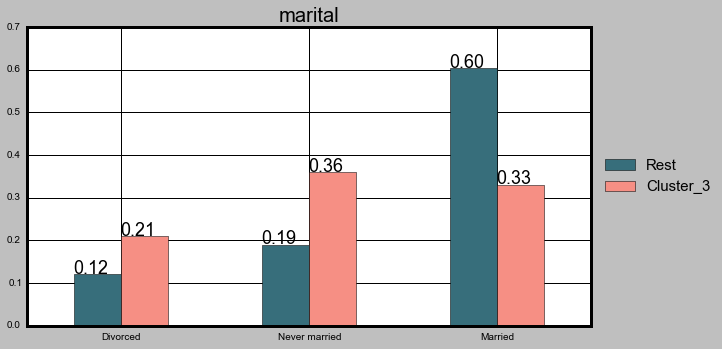

In [52]:
comb_bar(c3_mari,color = ['#376E7B', '#F68F84'],title = 'marital', figsize = (9,5))

In [49]:
matplotlib.style.available

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']

# Cluster 2 (Unemployed)


* ### agekdbrn 

In [29]:
df[df.cluster==2].agekdbrn.median()

25.0

* ### sphrs1

In [30]:
c2 = df[df.cluster==2]

c2[c2.sphrs1 <98].sphrs1.median()

50.0

In [31]:
df[df.sphrs1<98].sphrs1.median()

44.0

* ### coninc

In [32]:
df.coninc.median()

32273.0

In [33]:
df[df.cluster ==2].coninc.median()

52811.0

* ### partyid, polviews, reliten

In [34]:
c2_views = subset_all(df,2, ['partyid','polviews','reliten'] , 
                      [['Strong republican','Not str republican'],
                      ['Extrmly conservative','Conservative'],
                       ['Strong']
                      ])

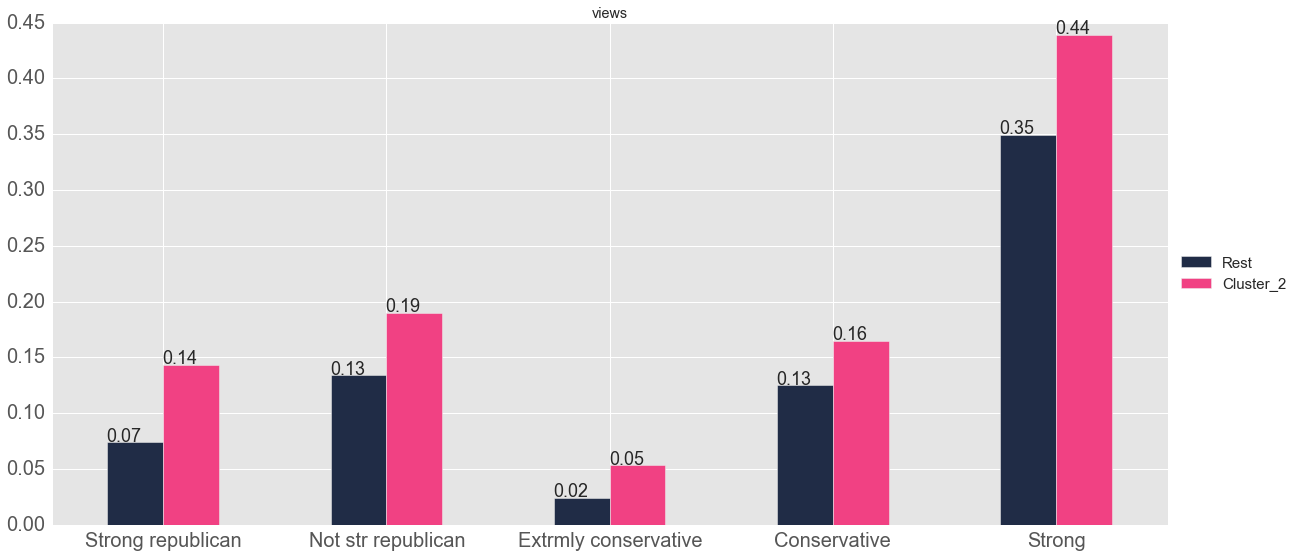

In [35]:
comb_bar(c2_views, color = ['#202C46','#F14183'], figsize = (20,9),fontsize = 20, title = "views")

* ### res16, incom 16

In [36]:
c2_16 = subset_all(df,2,['res16','incom16'],
                  [['Big-city suburb'],
                  ['Above average','Average']])

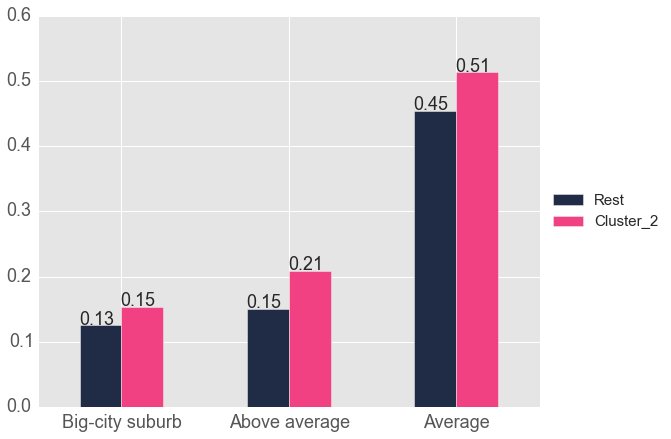

In [37]:
comb_bar(c2_16,color = ['#202C46','#F14183'], figsize = (9,7), fontsize = 18)

# Cluster 0

* ### coninc

In [38]:
df[df.cluster == 0].coninc.median()

49882.5

* ### agekdbrn

In [39]:
df[df.cluster ==0].agekdbrn.median()

25.0

* ### degree

In [40]:
c0_degr = subset_normed_df(df,0, 'degree',['Junior college','Bachelor', 'Graduate'])

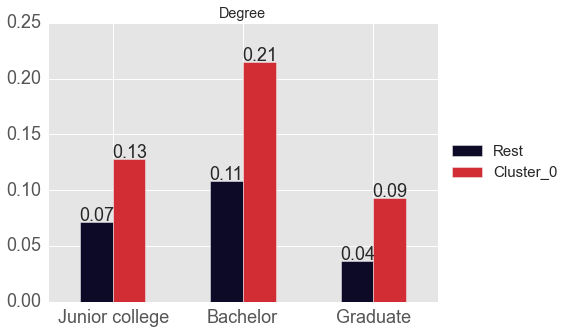

In [41]:
comb_bar(c0_degr,color = ['#0D0A28','#D22C34'],title = 'Degree',figsize = (7,5),fontsize = 18)

* ### class_, finrela

In [42]:
c0_fin = subset_all(df,0,['class_','finrela'],[['Middle class'],
                                              ['Average','Above average']])

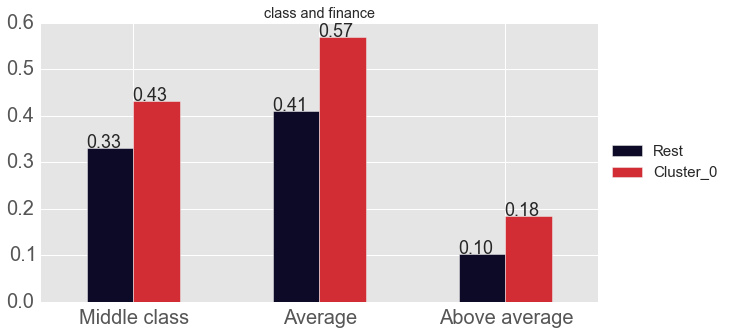

In [43]:
comb_bar(c0_fin,color = ['#0D0A28','#D22C34'], title = "class and finance", figsize = (10,5), fontsize = 20)

* ### polviews, partyid

In [44]:
c0_pol = subset_all(df,0,['polviews','partyid'],
                   [["Don't know",'Extrmly conservative','Liberal','Slghtly conservative'],
                   ['Independent','Not str republican','Not str democrat','Strong democrat']])

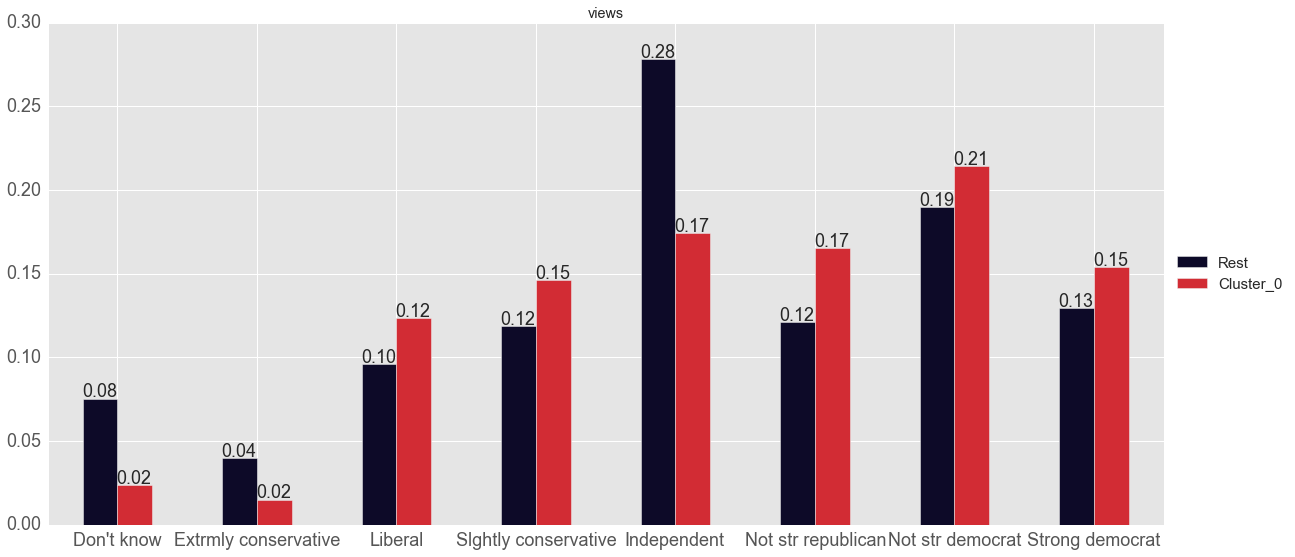

In [45]:
comb_bar(c0_pol,color = ['#0D0A28','#D22C34'], figsize = (20,9),title = 'views',fontsize = 18)